<img src="../src/packt-banner.png" alt="">

# Lesson 3: Web Scraping, API Requests and Interactive Visualizations

In this workbook you will find:
- Web scraping
- HTML parsing
- Interactive visualizations
---

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Ignore warnings (for seaborn's kdeplot)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, sklearn, requests, beautifulsoup4, bokeh

Software,Version
Python,3.5.4 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.1.0
OS,Darwin 16.7.0 x86_64 i386 64bit
pandas,0.20.3
numpy,1.13.1
matplotlib,2.0.2
seaborn,0.8.0
sklearn,0.19.0
requests,2.18.4
beautifulsoup4,4.6.0


---
## Topic A: Scraping web-page data
---
### Subtopic A: Introduction to HTTP requests
---

In [3]:
import requests

In [4]:
# Set up request header

url = 'https://jupyter.org/'
req = requests.Request('GET', url)
req.headers['User-Agent'] = 'Mozilla/5.0'
req = req.prepare()

In [5]:
requests.Request?

In [6]:
req?

In [7]:
# Make the request

with requests.Session() as sess:
    page = sess.send(req)

In [8]:
page

<Response [200]>

In [9]:
page.status_code

200

In [10]:
page_html = page.text

In [11]:
page_html[:1000]

'<!DOCTYPE html>\n<html>\n\n  <head>\n\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <meta name="description" content="">\n    <meta name="author" content="">\n\n    <title>Project Jupyter | Home</title>\n    <meta property="og:title" content="Project Jupyter" />\n    <meta property="og:description" content="The Jupyter Notebook is a web-based interactive computing platform. The notebook combines live code, equations, narrative text, visualizations, interactive dashboards and other media.\n">\n    <meta property="og:url" content="http://www.jupyter.org" />\n    <meta property="og:image" content="http://jupyter.org/assets/homepage.png" />\n    <!-- Bootstrap Core CSS -->\n    <script src="/cdn-cgi/apps/head/MuIIl4I_IVFkxldaVu1mdWee9as.js"></script><link rel="stylesheet" href="/css/bootstrap.min.css">\n    <link rel="stylesheet" href="/css/logo-nav.css">\n    <link rel=

In [12]:
from bs4 import BeautifulSoup
print(BeautifulSoup(page_html, 'html.parser').prettify()[:1000])

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="" name="author"/>
  <title>
   Project Jupyter | Home
  </title>
  <meta content="Project Jupyter" property="og:title">
   <meta content="The Jupyter Notebook is a web-based interactive computing platform. The notebook combines live code, equations, narrative text, visualizations, interactive dashboards and other media.
" property="og:description"/>
   <meta content="http://www.jupyter.org" property="og:url">
    <meta content="http://jupyter.org/assets/homepage.png" property="og:image">
     <!-- Bootstrap Core CSS -->
     <script src="/cdn-cgi/apps/head/MuIIl4I_IVFkxldaVu1mdWee9as.js">
     </script>
     <link href="/css/bootstrap.min.css" rel="stylesheet"/>
     <link href="/css/logo-nav.css" rel="stylesheet"/>
     <link href="/css/cardlist.

In [13]:
from IPython.display import HTML
HTML(page_html)

In [14]:
from IPython.display import IFrame
IFrame(src=url, height=800, width=800)

In [15]:
# Easier way to make a GET request

url = 'http://www.python.org/'
page = requests.get(url)
page

<Response [200]>

In [16]:
page.url

'https://www.python.org/'

In [17]:
page.history

[<Response [301]>]

---
### Subtopic B: Parsing HTML with Python
---

In [18]:
# Request the Wiki page

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_central_bank_interest_rates'
page = requests.get(url)
print(page.url, page.status_code)

https://en.wikipedia.org/wiki/List_of_countries_by_central_bank_interest_rates 200


In [19]:
# Load the HTML as a Beautiful Soup object

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [20]:
try:
    import pdir
    dir = pdir
except:
    print('You can install pdir with:\npip install pdir2')

dir(soup)

attribute access:
    __delattr__, __dir__, __getattr__, __getattribute__, __setattr__
class customization:
    __subclasshook__
copy:
    __copy__
emulating container:
    __contains__, __delitem__, __getitem__, __iter__, __len__, __setitem__
object customization:
    __bool__, __format__, __hash__, __init__, __new__, __repr__, __sizeof__, __str__
other:
    ASCII_SPACES, DEFAULT_BUILDER_FEATURES, HTML_FORMATTERS, NO_PARSER_SPECIFIED_WARNING, ROOT_TAG_NAME, XML_FORMATTERS, _is_xml, _most_recent_element, _select_debug, _selector_combinators, attribselect_re, attrs, builder, can_be_empty_element, children, contains_replacement_characters, contents, currentTag, current_data, declared_html_encoding, descendants, hidden, isSelfClosing, is_empty_element, is_xml, known_xml, markup, name, namespace, next, nextSibling, next_element, next_elements, next_sibling, next_siblings, original_encoding, parent, parents, parse_only, prefix, preserve_whitespace_tag_stack, preserve_whitespace_tags, previo

In [21]:
# What is the primary heading tag(s)?

h1 = soup.find_all('h1')
h1

[<h1 class="firstHeading" id="firstHeading" lang="en">List of countries by central bank interest rates</h1>]

In [22]:
# Pick out first list element
h1 = h1[0]

In [23]:
# Print the HTML element attributes
h1.attrs

{'class': ['firstHeading'], 'id': 'firstHeading', 'lang': 'en'}

In [24]:
# Get the visible text
h1.text

'List of countries by central bank interest rates'

In [25]:
# Get the images on the page

imgs = soup.find_all('img')
len(imgs)

92

In [26]:
# Print the image source URIs

[element.attrs['src'] for element in imgs
 if 'src' in element.attrs.keys()]

['//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/21px-Flag_of_Albania.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/23px-Flag_of_Argentina.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/23px-Flag_of_Armenia.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/23px-Flag_of_Australia.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/23px-Flag_of_Azerbaijan.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/23px-Flag_of_the_Bahamas.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/23px-Flag_of_Bahrain.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/23px-Flag_of_Bangladesh.svg.png',
 '//upload.wikimedia.org/wikipedia

In [27]:
# Get the body content div
body_content = soup.find('div', {'id': 'bodyContent'})

In [28]:
# Get the table headers

table_headers = body_content.find_all('th')[:3]
table_headers

[<th>Country or<br/>
 currency union</th>, <th>Central bank<br/>
 interest rate (%)</th>, <th>Date of last<br/>
 change</th>]

In [29]:
# Get the text

table_headers = [element.get_text().replace('\n', ' ')
                 for element in table_headers]
table_headers

['Country or currency union',
 'Central bank interest rate (%)',
 'Date of last change']

In [30]:
# Get the data for a sample row

row_number = 2
d1, d2, d3 = body_content.find_all('tr')[row_number]\
                .find_all('td')

In [31]:
d1

<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="300" data-file-width="450" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/35px-Flag_of_Angola.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/45px-Flag_of_Angola.svg.png 2x" width="23"/> </span><a href="/wiki/Angola" title="Angola">Angola</a></td>

In [32]:
d1.text

'\xa0Angola'

In [33]:
d1.find('a').text

'Angola'

In [34]:
d2

<td>16.00</td>

In [35]:
float(d2.text)

16.0

In [36]:
d3

<td><span class="sortkey" style="display:none;speak:none">000000002016-06-30-0000</span><span style="white-space:nowrap">30 June 2016</span><sup class="reference" id="cite_ref-CentralBankNews_1-1"><a href="#cite_note-CentralBankNews-1">[1]</a></sup></td>

In [37]:
d3.text

'000000002016-06-30-000030 June 2016[1]'

In [38]:
d3.find_all('span')[1].text

'30 June 2016'

In [39]:
# Perform the full scrape by iterating over the rows

data = []
for i, row in enumerate(body_content.find_all('tr')):
    row_data = row.find_all('td')
    if len(row_data) != 3:
        print('Ignoring row {} because len(data) != 3'.format(i))
        continue
        
    d1, d2, d3 = row_data
    try:
        d1 = d1.find('a').text
        d2 = float(d2.text)
        d3 = d3.find_all('span')[1].text
    except:
        print('Ignoring row {} because exception raised'.format(i))
        continue
        
    data.append([d1, d2, d3])

Ignoring row 0 because len(data) != 3
Ignoring row 10 because exception raised
Ignoring row 26 because exception raised
Ignoring row 89 because exception raised
Ignoring row 94 because len(data) != 3
Ignoring row 95 because len(data) != 3
Ignoring row 96 because len(data) != 3
Ignoring row 97 because len(data) != 3
Ignoring row 98 because len(data) != 3
Ignoring row 99 because len(data) != 3
Ignoring row 100 because len(data) != 3
Ignoring row 101 because len(data) != 3
Ignoring row 102 because len(data) != 3
Ignoring row 103 because len(data) != 3


In [40]:
body_content.find_all('tr')[88]

<tr>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="/wiki/United_States" title="United States">United States</a></td>
<td>1.50</td>
<td><span class="sortkey" style="display:none;speak:none">000000002017-12-13-0000</span><span style="white-space:nowrap">13 December 2017</span><sup class="reference" id="cite_ref-CentralBankNews_1-85"><a href="#cite_note-CentralBankNews-1">[1]</a></sup><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></td>
</tr>

In [41]:
data[:10]

[['Albania', 1.05, '4 May 2016'],
 ['Angola', 16.0, '30 June 2016'],
 ['Argentina', 26.25, '11 April 2017'],
 ['Armenia', 6.0, '14 February 2017'],
 ['Australia', 1.5, '2 August 2016'],
 ['Azerbaijan', 15.0, '9 September 2016'],
 ['Bahamas', 4.0, '22 December 2016'],
 ['Bahrain', 1.51, '14 June 2017'],
 ['Bangladesh', 6.75, '14 January 2016'],
 ['Belarus', 12.0, '28 June 2017']]

In [42]:
# Save data to a CSV file

f_path = '../data/countries/interest-rates.csv'
with open(f_path, 'w') as f:
    f.write('{};{};{}\n'.format(*table_headers))
    for d in data:
        f.write('{};{};{}\n'.format(*d))

---
### Activity A: Web scraping with Python
---

In [43]:
# Check out the page

url = 'http://www.worldometers.info/world-population/population-by-country/'
IFrame(url, height=300, width=800)

In [44]:
# Request the page

page = requests.get(url)
page

<Response [200]>

In [45]:
# Instantiate Beautiful Soup object

soup = BeautifulSoup(page.content, 'html.parser')

In [46]:
# Get the H1

soup.find_all('h1')

[<h1>Countries in the world by population (2018)</h1>]

In [47]:
# Get the table headers

table_headers = soup.find_all('th')
table_headers

[<th>#</th>,
 <th>Country (or dependency)</th>,
 <th>Population<br/> (2018)</th>,
 <th>Yearly<br/> Change</th>,
 <th>Net<br/> Change</th>,
 <th>Density<br/> (P/Km²)</th>,
 <th>Land Area<br/> (Km²)</th>,
 <th>Migrants<br/> (net)</th>,
 <th>Fert.<br/> Rate</th>,
 <th>Med.<br/> Age</th>,
 <th>Urban<br/> Pop %</th>,
 <th>World<br/> Share</th>]

In [48]:
# Parse the table header text

table_headers = table_headers[1:4]
table_headers = [t.text.replace('\n', '') for t in table_headers]

In [49]:
# Get the data for a sample row

row_number = 2
row_data = soup.find_all('tr')[row_number]\
                .find_all('td')

In [50]:
# How many columns of data?
len(row_data)

12

In [51]:
# Print the first few
row_data[:4]

[<td>2</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td>,
 <td style="font-weight: bold;">1,354,051,854</td>,
 <td>1.11 %</td>]

In [52]:
# Get the three elements we want

d1, d2, d3 = row_data[1:4]

In [53]:
d1.find('a').text

'India'

In [54]:
d2.text

'1,354,051,854'

In [55]:
d3.text

'1.11 %'

In [56]:
# Scrape the entire table

data = []
for i, row in enumerate(soup.find_all('tr')):
    try:
        d1, d2, d3 = row.find_all('td')[1:4]
        d1 = d1.find('a').text
        d2 = d2.text
        d3 = d3.text
        data.append([d1, d2, d3])
    except:
        print('Error parsing row {}'.format(i))

Error parsing row 0


In [57]:
data[:10]

[['China', '1,415,045,928', '0.39 %'],
 ['India', '1,354,051,854', '1.11 %'],
 ['U.S.', '326,766,748', '0.71 %'],
 ['Indonesia', '266,794,980', '1.06 %'],
 ['Brazil', '210,867,954', '0.75 %'],
 ['Pakistan', '200,813,818', '1.93 %'],
 ['Nigeria', '195,875,237', '2.61 %'],
 ['Bangladesh', '166,368,149', '1.03 %'],
 ['Russia', '143,964,709', '-0.02 %'],
 ['Mexico', '130,759,074', '1.24 %']]

In [58]:
# Save data to a CSV file

f_path = '../data/countries/populations.csv'
with open(f_path, 'w') as f:
    f.write('{};{};{}\n'.format(*table_headers))
    for d in data:
        f.write('{};{};{}\n'.format(*d))

---
## Topic B: Interactive visualizations
---
### Subtopic A: Building a DataFrame to store and organize data

---

In [59]:
# Load the data into Python lists

with open('../data/countries/interest-rates.csv', 'r') as f:
    int_rates_col_names = next(f).strip().split(';')
    int_rates = [line.split(';') for line in f.read().splitlines()]
    
with open('../data/countries/populations.csv', 'r') as f:
    populations_col_names = next(f).strip().split(';')
    populations = [line.split(';') for line in f.read().splitlines()]

In [60]:
# Check what the interest rate data looks like

print(int_rates_col_names)
int_rates[:5]

['Country or currency union', 'Central bank interest rate (%)', 'Date of last change']


[['Albania', '1.05', '4 May 2016'],
 ['Angola', '16.0', '30 June 2016'],
 ['Argentina', '26.25', '11 April 2017'],
 ['Armenia', '6.0', '14 February 2017'],
 ['Australia', '1.5', '2 August 2016']]

In [61]:
# Check what the population data looks like

print(populations_col_names)
populations[:5]

['Country (or dependency)', 'Population (2018)', 'Yearly Change']


[['China', '1,415,045,928', '0.39 %'],
 ['India', '1,354,051,854', '1.11 %'],
 ['U.S.', '326,766,748', '0.71 %'],
 ['Indonesia', '266,794,980', '1.06 %'],
 ['Brazil', '210,867,954', '0.75 %']]

In [62]:
# Load the data

df_int_rates = pd.DataFrame(int_rates, columns=int_rates_col_names)
df_populations = pd.DataFrame(populations, columns=populations_col_names)

In [63]:
# Change max row limit
pd.options.display.max_rows = 10

In [64]:
# The first dataframe

df_int_rates

,Country or currency union,Central bank interest rate (%),Date of last change
0,Albania,1.05,4 May 2016
1,Angola,16.0,30 June 2016
2,Argentina,26.25,11 April 2017
3,Armenia,6.0,14 February 2017
4,Australia,1.5,2 August 2016
...,...,...,...
85,United States,1.5,13 December 2017
86,Uzbekistan,9.0,1 January 2015
87,Vietnam,6.25,7 July 2017
88,West African States,3.5,16 September 2013


In [65]:
df_int_rates.dtypes

Country or currency union         object
Central bank interest rate (%)    object
Date of last change               object
dtype: object

In [66]:
# Alter datatypes

df_int_rates['Central bank interest rate (%)'] =\
        df_int_rates['Central bank interest rate (%)']\
            .astype(float, copy=False)
    
df_int_rates['Date of last change'] = \
        pd.to_datetime(df_int_rates['Date of last change'])

In [67]:
df_int_rates.dtypes

Country or currency union                 object
Central bank interest rate (%)           float64
Date of last change               datetime64[ns]
dtype: object

In [68]:
# The second dataframe

df_populations

,Country (or dependency),Population (2018),Yearly Change
0,China,"1,415,045,928",0.39 %
1,India,"1,354,051,854",1.11 %
2,U.S.,"326,766,748",0.71 %
3,Indonesia,"266,794,980",1.06 %
4,Brazil,"210,867,954",0.75 %
...,...,...,...
228,Saint Helena,"4,074",0.62 %
229,Falkland Islands,"2,922",0.41 %
230,Niue,"1,624",0.37 %
231,Tokelau,"1,319",1.46 %


In [69]:
df_populations.dtypes

Country (or dependency)    object
Population (2018)          object
Yearly Change              object
dtype: object

In [70]:
# Alter the datatypes

df_populations['Population (2018)'] = df_populations['Population (2018)']\
                                        .str.replace(',', '')\
                                        .astype(float, copy=False)

df_populations['Yearly Change'] = df_populations['Yearly Change']\
                                    .str.rstrip('%')\
                                    .astype(float, copy=False)

In [71]:
df_populations.dtypes

Country (or dependency)     object
Population (2018)          float64
Yearly Change              float64
dtype: object

In [72]:
# Merge the two DataFrames on the country names

df_merge = pd.merge(df_populations,
                    df_int_rates,
                    left_on='Country (or dependency)',
                    right_on='Country or currency union',
                    how='outer')
df_merge

,Country (or dependency),Population (2018),Yearly Change,Country or currency union,Central bank interest rate (%),Date of last change
0,China,1.415046e+09,0.39,China,1.75,2015-10-23
1,India,1.354052e+09,1.11,India,6.00,2017-08-02
2,U.S.,3.267667e+08,0.71,NaN,NaN,NaT
3,Indonesia,2.667950e+08,1.06,Indonesia,4.75,2016-10-20
4,Brazil,2.108680e+08,0.75,Brazil,7.25,2017-07-26
...,...,...,...,...,...,...
237,NaN,NaN,NaN,UAE,2.00,2017-06-14
238,NaN,NaN,NaN,United Kingdom,0.50,2017-11-02
239,NaN,NaN,NaN,United States,1.50,2017-12-13
240,NaN,NaN,NaN,Vietnam,6.25,2017-07-07


In [73]:
df_merge.sort_values('Population (2018)', ascending=False)\
    .head(10)

,Country (or dependency),Population (2018),Yearly Change,Country or currency union,Central bank interest rate (%),Date of last change
0,China,1.415046e+09,0.39,China,1.75,2015-10-23
1,India,1.354052e+09,1.11,India,6.00,2017-08-02
2,U.S.,3.267667e+08,0.71,NaN,NaN,NaT
3,Indonesia,2.667950e+08,1.06,Indonesia,4.75,2016-10-20
4,Brazil,2.108680e+08,0.75,Brazil,7.25,2017-07-26
5,Pakistan,2.008138e+08,1.93,Pakistan,5.75,2016-05-21
6,Nigeria,1.958752e+08,2.61,Nigeria,14.00,2016-07-26
7,Bangladesh,1.663681e+08,1.03,Bangladesh,6.75,2016-01-14
8,Russia,1.439647e+08,-0.02,Russia,7.25,2018-03-23
9,Mexico,1.307591e+08,1.24,Mexico,7.00,2017-06-22


In [74]:
# Fix the U.S. label

col = 'Country (or dependency)'
df_populations.loc[df_populations[col] == 'U.S.', col] = 'United States'

In [75]:
# Re merge on country names

df_merge = pd.merge(df_populations,
                    df_int_rates,
                    left_on='Country (or dependency)',
                    right_on='Country or currency union',
                    how='inner')
df_merge

,Country (or dependency),Population (2018),Yearly Change,Country or currency union,Central bank interest rate (%),Date of last change
0,China,1.415046e+09,0.39,China,1.75,2015-10-23
1,India,1.354052e+09,1.11,India,6.00,2017-08-02
2,United States,3.267667e+08,0.71,United States,1.50,2017-12-13
3,Indonesia,2.667950e+08,1.06,Indonesia,4.75,2016-10-20
4,Brazil,2.108680e+08,0.75,Brazil,7.25,2017-07-26
...,...,...,...,...,...,...
77,Mauritius,1.268315e+06,0.25,Mauritius,4.00,2016-07-20
78,Fiji,9.122410e+05,0.74,Fiji,0.50,2011-11-02
79,Bahamas,3.992850e+05,0.99,Bahamas,4.00,2016-12-22
80,Iceland,3.377800e+05,0.82,Iceland,4.50,2017-06-14


In [76]:
del df_merge['Country or currency union']

In [77]:
# Rename columns

name_map = {'Country (or dependency)': 'Country',
            'Population (2018)': 'Population',
            'Central bank interest rate (%)': 'Interest rate'}

df_merge = df_merge.rename(columns=name_map)

In [78]:
df_merge

,Country,Population,Yearly Change,Interest rate,Date of last change
0,China,1.415046e+09,0.39,1.75,2015-10-23
1,India,1.354052e+09,1.11,6.00,2017-08-02
2,United States,3.267667e+08,0.71,1.50,2017-12-13
3,Indonesia,2.667950e+08,1.06,4.75,2016-10-20
4,Brazil,2.108680e+08,0.75,7.25,2017-07-26
...,...,...,...,...,...
77,Mauritius,1.268315e+06,0.25,4.00,2016-07-20
78,Fiji,9.122410e+05,0.74,0.50,2011-11-02
79,Bahamas,3.992850e+05,0.99,4.00,2016-12-22
80,Iceland,3.377800e+05,0.82,4.50,2017-06-14


In [79]:
# Write to CSV

df_merge.to_csv('../data/countries/merged.csv', index=False)

---
### Subtopic B: Introduction to Bokeh
---

In [80]:
# Load Bokeh for the notebook

from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [81]:
# An example plot

np.random.seed(30)
data = pd.Series(np.random.randn(200),
                 index=list(range(200)))\
        .cumsum()
x = data.index
y = data.values

p = figure(title='Example plot', x_axis_label='x', y_axis_label='y')
p.line(x, y, legend='Random trend')
show(p)

In [82]:
size = np.random.rand(200) * 5

p = figure(title='Example plot', x_axis_label='x', y_axis_label='y')
p.circle(x, y, radius=size, alpha=0.5, legend='Random dots')
show(p)

In [83]:
# Add a tooltip

from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool

source = ColumnDataSource(data=dict(
    x=x,
    y=y,
    r=size,
    meta=np.random.choice(list('ABC'), size=len(x)),
))

hover = HoverTool(tooltips=[
    ('Label', '@meta'),
    ('Size', '@r')
])
tools = [hover]

p = figure(title='Example plot', tools=tools,
           x_axis_label='x', y_axis_label='y')

p.circle('x', 'y', radius='r', alpha=0.5, source=source,
         legend='Random dots')
show(p)

In [84]:
# Add back the other tools as well

from bokeh.models import PanTool, BoxZoomTool, WheelZoomTool, ResetTool

source = ColumnDataSource(data=dict(
    x=x,
    y=y,
    r=size,
    meta=np.random.choice(list('ABC'), size=len(x)),
))

hover = HoverTool(tooltips=[
    ('Label', '@meta'),
    ('Size', '@r')
])
tools = [hover, PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool()]

p = figure(title='Example plot', tools=tools,
           x_axis_label='x', y_axis_label='y')

p.circle('x', 'y', radius='r', alpha=0.5, source=source,
         legend='Random dots')
show(p)

---
### Activity B: Exploring data with interactive visualizations
---

In [85]:
# Load in the data
df = pd.read_csv('../data/countries/merged.csv')
df['Date of last change'] = pd.to_datetime(df['Date of last change'])

In [86]:
df

,Country,Population,Yearly Change,Interest rate,Date of last change
0,China,1.415046e+09,0.39,1.75,2015-10-23
1,India,1.354052e+09,1.11,6.00,2017-08-02
2,United States,3.267667e+08,0.71,1.50,2017-12-13
3,Indonesia,2.667950e+08,1.06,4.75,2016-10-20
4,Brazil,2.108680e+08,0.75,7.25,2017-07-26
...,...,...,...,...,...
77,Mauritius,1.268315e+06,0.25,4.00,2016-07-20
78,Fiji,9.122410e+05,0.74,0.50,2011-11-02
79,Bahamas,3.992850e+05,0.99,4.00,2016-12-22
80,Iceland,3.377800e+05,0.82,4.50,2017-06-14


In [87]:
# Plot the population compared to the interest rate

source = ColumnDataSource(data=dict(
    x=df['Interest rate'],
    y=df['Population'],
    desc=df['Country'],
    radii=df['Yearly Change']
))

hover = HoverTool(tooltips=[
    ('Country', '@desc'),
    ('Interest Rate (%)', '@x'),
    ('Population', '@y')
])
tools = [hover, PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool()]

p = figure(tools=tools,
           x_axis_label='Interest Rate (%)',
           y_axis_label='Population')

p.circle('x', 'y', size=10, alpha=0.5, source=source)
show(p)

In [88]:
# Add year of last change column

def get_year(x):
    year = x.strftime('%Y')
    if year in ['2018', '2017', '2016']:
        return year
    else:
        return 'Other' 
    
df['Year of last change'] = df['Date of last change'].apply(get_year)

In [89]:
# Re-plot the above figure,
# adding colors based on year
# of last interest rate change

year_to_color = {
    '2018': 'black',
    '2017': 'blue',
    '2016': 'orange',
    'Other':'red'
}

source = ColumnDataSource(data=dict(
    x=df['Interest rate'],
    y=df['Population'],
    desc=df['Country'],
    colors=df['Year of last change'].map(year_to_color),
    label=df['Year of last change']
))

hover = HoverTool(tooltips=[
    ('Country', '@desc'),
    ('Interest Rate (%)', '@x'),
    ('Population', '@y')
])
tools = [hover, PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool()]

p = figure(tools=tools,
           x_axis_label='Interest Rate (%)',
           y_axis_label='Population')

p.circle('x', 'y', size=10, alpha=0.5, source=source,
         fill_color='colors', line_color='black',
         legend='label')
show(p)

In [90]:
df.columns

Index(['Country', 'Population', 'Yearly Change', 'Interest rate',
       'Date of last change', 'Year of last change'],
      dtype='object')

In [91]:
hover = HoverTool(tooltips=[
    ('Country', '@desc'),
    ('Population Change (%)', '@x'),
    ('Interest Rate (%)', '@y')
])

source = ColumnDataSource(data=dict(
    x=df['Yearly Change'],
    y=df['Interest rate'],
    desc=df['Country'],
    radii=np.sqrt(df['Population'])/1e5,
    population=df['Population']/1e6
))

hover = HoverTool(tooltips=[
    ('Country', '@desc'),
    ('Population (millions)', '@population'),
    ('YoY Population Change', '@x'),
    ('Interest Rate (%)', '@y')
])
tools = [hover, PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool()]

p = figure(tools=tools,
           x_axis_label='YoY Population Change',
           y_axis_label='Interest Rate')

p.circle('x', 'y', size=10, alpha=0.5, source=source,
         radius='radii')
show(p)

In [92]:
# Add a line of best fit

from sklearn.linear_model import LinearRegression

X = df['Yearly Change'].values.reshape(-1, 1)
y = df['Interest rate'].values
weights = np.sqrt(df['Population'])/1e5

lm = LinearRegression()
lm.fit(X, y, sample_weight=weights)
lm_x = np.linspace(X.flatten().min(), X.flatten().max(), 50)
lm_y = lm.predict(lm_x.reshape(-1, 1))

In [93]:
# Re-plot the above, including a line of best fit

source = ColumnDataSource(data=dict(
    x=df['Yearly Change'],
    y=df['Interest rate'],
    desc=df['Country'],
    radii=np.sqrt(df['Population'])/1e5,
    population=df['Population']/1e6
))

lm_source = ColumnDataSource(data=dict(
    x=lm_x,
    y=lm_y,
    desc=['N/A']*len(lm_x),
    population=['N/A']*len(lm_x)
))

hover = HoverTool(tooltips=[
    ('Country', '@desc'),
    ('Population (millions)', '@population'),
    ('YoY Population Change', '@x'),
    ('Interest Rate (%)', '@y')
])
tools = [hover, PanTool(), BoxZoomTool(), WheelZoomTool(), ResetTool()]

p = figure(tools=tools,
           x_axis_label='YoY Population Change',
           y_axis_label='Interest Rate')

p.circle('x', 'y', size=10, alpha=0.5, source=source,
         radius='radii')
p.line('x', 'y', line_width=2, line_color='red',
       source=lm_source)

show(p)

---
### External Content: Scraping cryptocurrency price data
---

In [94]:
soup = BeautifulSoup(requests.get('https://coinmarketcap.com/').content, 'lxml')

In [95]:
rows = soup.find_all('tr')

In [96]:
coins = []
prices = []

for row in rows:    
    try:
        coins.append(row.find_all('td')[1].find_all('a')[1].text)
        prices.append(float(row.find_all('td')[2].text.strip().replace('$', '').replace(',', '')))
    except:
        pass

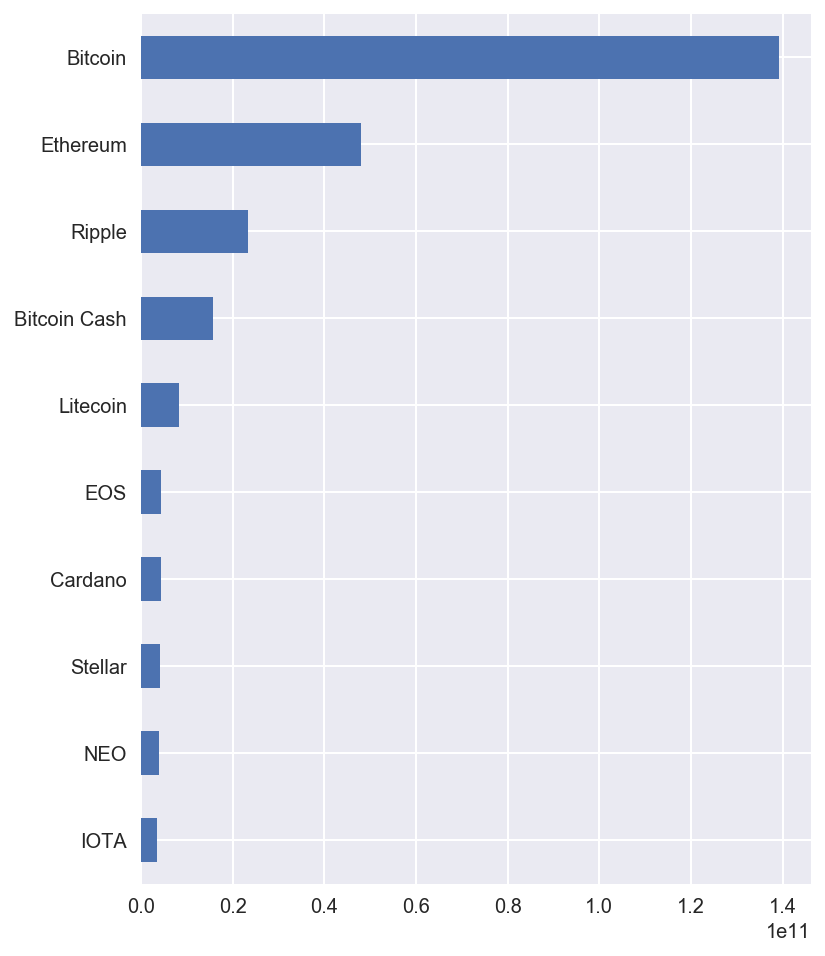

In [97]:
fig = plt.figure(figsize=(6, 8))
pd.Series(prices, index=coins)[::-1].iloc[-10:].plot.barh()
plt.savefig('../figures/lesson-3-crypto-prices.png', bbox_inches='tight', dpi=300)